# DESAFIO 0
* **Grupo 03**
  * `Afonso Vieira`
  * `Carol Barbosa`
  * `Lucas Taveira`
  * `Luis Fernandes`
  * `Luis Fernando`

# Luiz Fernando

 > **The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.**

---



## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

* Foi realizada a importação dos modulos Pandas Numpy Matplot e Seaborn
  * O conjunto de dados já está em formato csv, sendo necessário então formatar os dados em um dataframe pandas.
 Isso é feito utilizando read_csv - Resulta em um dataframe pandas organizado .


In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

In [2]:
# O data frame aqui chamado de df_auto foi disponibilizado em um link publico e o import é realizado através dele 
url = "https://raw.githubusercontent.com/LucasTaveiraGon/DesafiosDH/main/Aula14_Desafio_0_Grupo_03/auto_industry.csv"
df_auto = pd.read_csv(filepath_or_buffer=url)
df_auto = pd.read_csv("auto_industry.csv")
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


> * Numa análise incial percebemos que temos uma janela de 13 anos e durante esse periodo 398 registros de veiculos quê possuiam  médias de 104.469388 Cavalos de potência e eficiência de 23.5 galões por milha pertecente a 3 mercados diferentes dos quais a sua maioria são dos Eua( aprx 62,5% ), o restante sendo dividido entre Japão e Europa

In [3]:
# Para saber o número de linhas e colunas (forma)
df_auto.shape

(398, 9)

In [4]:
df_auto.count()

mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

In [5]:
# Para identificar o tipo de dados: info() - Imprime as colunas, numero de inserções não nulas e o tipo de dado aramazenado em cada coluna
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# Análise Inicial - Descritiva
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# Para contar as ocorrências dos objetos:
df_auto['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

> Verificamos a existencia de apenas 6 entradas nulas em todo o data frame na coluna 'horsepower' e optamos por preencher os valores faltantes com a media dos valores da coluna

In [8]:
# Para verificar a ocorrência de campos nulos:
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
# Retornar as linhas em que estão os dados faltantes:
df_auto[df_auto['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [10]:
# Verificar estatística descritiva da feature:
df_auto['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [11]:
# Substituir valores faltantes pela média da coluna:
df_auto = df_auto.fillna({'horsepower':np.mean(df_auto['horsepower'])})

In [12]:
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#Luiz Fernandes

## Calcule quantos modelos foram lançados em anos pares

In [13]:
#A quantidade de veículos lançados em anos pares é 214
df_auto[df_auto['model_year'] %2 == 0].value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year  origin  name                    
9.0   8          304.0         193.0       4732    18.5          70          usa     hi 1200d                    1
27.0  4          97.0          88.0        2100    16.5          72          japan   toyota corolla 1600 (sw)    1
                 101.0         83.0        2202    15.3          76          europe  renault 12tl                1
                 112.0         88.0        2640    18.6          82          usa     chevrolet cavalier wagon    1
                 140.0         86.0        2790    15.6          82          usa     ford mustang gl             1
                                                                                                                ..
20.0  6          198.0         95.0        3102    16.5          74          usa     plymouth duster             1
                 225.0         100.0       3651    17.7          76          usa     

## Crie uma coluna para a marca do veículo e outra para o nome

In [14]:
df_auto[['Marca', 'Nome']] = df_auto['name'].str.split(' ', expand=True, n=1)
df_auto = df_auto.drop(['name'], axis=1)
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


## É posível identificar alguma relação entre mpg e acceleration?

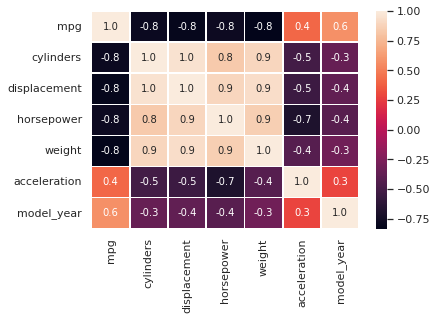

In [15]:
correlation = df_auto.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

# Variáveis que possuem escala de 0,5 a 0,25 e (+ ou -) possuem baixa correlação.

# Afonso Vieira

## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [16]:
df_auto_usa = df_auto.groupby('origin').get_group('usa')
df_auto_usa

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet,camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


In [17]:
df_auto_usa.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,20.083534,6.248996,245.901606,118.814769,3361.931727,15.033735,75.610442
std,6.402892,1.661425,98.501839,39.617323,794.792506,2.751112,3.677094
min,9.000000,4.000000,85.000000,52.000000,1800.000000,8.000000,70.000000
25%,15.000000,4.000000,151.000000,88.000000,2720.000000,13.000000,73.000000
50%,18.500000,6.000000,250.000000,105.000000,3365.000000,15.000000,76.000000
75%,24.000000,8.000000,318.000000,150.000000,4054.000000,16.900000,79.000000
max,39.000000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000


In [18]:
df_auto_usa= pd.pivot_table(df_auto_usa,index=['mpg','acceleration'])
df_auto_usa

cylinders  displacement  horsepower  model_year  weight
mpg  acceleration                                                         
9.0  18.5                  8         304.0       193.0        70.0  4732.0
10.0 14.0                  8         360.0       215.0        70.0  4615.0
     15.0                  8         307.0       200.0        70.0  4376.0
11.0 11.0                  8         389.5       194.0        72.5  4148.5
     13.5                  8         318.0       210.0        70.0  4382.0
...                      ...           ...         ...         ...     ...
36.0 17.3                  4          98.0        70.0        82.0  2125.0
36.1 14.4                  4          98.0        66.0        78.0  1800.0
38.0 14.7                  4         105.0        63.0        82.0  2125.0
     17.0                  6         262.0        85.0        82.0  3015.0
39.0 16.4                  4          86.0        64.0        81.0  1875.0

[217 rows x 5 columns]

## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [19]:
# Alterar iniciais para letras maiusculas:
df_auto['origin'] = df_auto['origin'].str.capitalize()
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford,ranger


In [20]:
# Remover elementos duplicados: referência - nome do carro
df_auto.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
Marca           398
Nome            396
dtype: int64

In [21]:
df_auto = df_auto.drop_duplicates(subset='Nome', keep='first')
df_auto.count()

mpg             300
cylinders       300
displacement    300
horsepower      300
weight          300
acceleration    300
model_year      300
origin          300
Marca           300
Nome            299
dtype: int64

> Criar uma tabela de consumo em (Km/L): 1 Miles per gallon (US) [mpg] = 0,42 (0,425144) Quilômetros por litro [km/l]

In [22]:
df_auto.insert(1, 'Km_por_L', df_auto['mpg'] * 0.42)
df_auto

,mpg,Km_por_L,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome
0,18.0,7.56,8,307.0,130.0,3504,12.0,70,Usa,chevrolet,chevelle malibu
1,15.0,6.30,8,350.0,165.0,3693,11.5,70,Usa,buick,skylark 320
2,18.0,7.56,8,318.0,150.0,3436,11.0,70,Usa,plymouth,satellite
3,16.0,6.72,8,304.0,150.0,3433,12.0,70,Usa,amc,rebel sst
4,17.0,7.14,8,302.0,140.0,3449,10.5,70,Usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,11.34,4,140.0,86.0,2790,15.6,82,Usa,ford,mustang gl
394,44.0,18.48,4,97.0,52.0,2130,24.6,82,Europe,vw,pickup
395,32.0,13.44,4,135.0,84.0,2295,11.6,82,Usa,dodge,rampage
396,28.0,11.76,4,120.0,79.0,2625,18.6,82,Usa,ford,ranger


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [23]:
df_auto_mpg = pd.pivot_table(df_auto,index=['model_year','cylinders'],aggfunc={'mpg':np.mean})
df_auto_mpg

mpg
model_year cylinders           
70         4          25.285714
           6          20.500000
           8          14.111111
71         4          27.500000
           6          18.000000
           8          13.000000
72         3          19.000000
           4          23.428571
           8          13.444444
73         3          18.000000
           4          23.333333
           6          18.750000
           8          13.277778
74         4          28.111111
           6          16.333333
           8          13.500000
75         4          27.200000
           6          18.166667
           8          16.000000
76         4          26.500000
           6          18.100000
           8          14.083333
77         3          21.500000
           4          28.875000
           6          19.500000
           8          15.785714
78         4          29.228571
           5          20.300000
           6          18.936364
           8          19.020000
79         4          31.677778
           5          25.400000
           6          22.950000
           8          18.833333
80         3          23.700000
           4          35.931250
           5          36.400000
           6          32.700000
81         4          33.512500
           6          23.620000
           8          26.600000
82         4          31.791667
           6          28.333333

>Podemos ver que a relação entre a quantidade de cilindros e galões por milha são inversamente proporcionais e que com o passar dos anos os carros com maior quantidade de cilindros passam a render maior milhagem pro galão.

# Lucas Taveira

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [24]:
df_auto.groupby(['origin', 'cylinders']).agg({'horsepower' : 'mean'})

horsepower
origin cylinders            
Europe 4           79.082058
       5           82.333333
       6          113.500000
Japan  3           99.250000
       4           76.680000
       6          117.400000
Usa    4           82.310860
       6          100.360000
       8          161.587500

### Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

In [25]:
df_auto_modelyear = df_auto[df_auto['model_year'] %2 == 0]
df_auto_horsepower = pd.pivot_table(df_auto_modelyear,index=['origin', 'model_year','cylinders'],aggfunc={'mpg':np.mean})
df_auto_horsepower

mpg
origin model_year cylinders           
Europe 70         4          25.200000
       72         4          22.000000
       74         4          28.000000
       76         4          25.000000
                  6          16.500000
       78         4          32.066667
                  5          20.300000
                  6          16.600000
       80         4          37.983333
                  5          36.400000
       82         4          40.000000
Japan  70         4          25.500000
       72         3          19.000000
                  4          25.500000
       74         4          28.250000
       76         4          32.000000
       78         4          28.983333
       80         3          23.700000
                  4          37.125000
                  6          32.700000
       82         4          34.333333
Usa    70         6          20.500000
                  8          14.111111
       72         4          23.200000
                  8          13.444444
       74         4          28.000000
                  6          16.333333
                  8          13.500000
       76         4          26.166667
                  6          18.500000
                  8          14.083333
       78         4          27.820000
                  6          19.455556
                  8          19.020000
       80         4          25.000000
       82         4          29.812500
                  6          28.333333

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [26]:
df_auto.loc[df_auto['origin'] == 'Japan', 'Region'] = 'Asia'
df_auto.loc[df_auto['origin'] == 'Usa', 'Region'] = 'North America'
df_auto.loc[df_auto['origin'] == 'Europe', 'Region'] = 'Europe'
df_auto

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,mpg,Km_por_L,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome,Region
0,18.0,7.56,8,307.0,130.0,3504,12.0,70,Usa,chevrolet,chevelle malibu,North America
1,15.0,6.30,8,350.0,165.0,3693,11.5,70,Usa,buick,skylark 320,North America
2,18.0,7.56,8,318.0,150.0,3436,11.0,70,Usa,plymouth,satellite,North America
3,16.0,6.72,8,304.0,150.0,3433,12.0,70,Usa,amc,rebel sst,North America
4,17.0,7.14,8,302.0,140.0,3449,10.5,70,Usa,ford,torino,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,11.34,4,140.0,86.0,2790,15.6,82,Usa,ford,mustang gl,North America
394,44.0,18.48,4,97.0,52.0,2130,24.6,82,Europe,vw,pickup,Europe
395,32.0,13.44,4,135.0,84.0,2295,11.6,82,Usa,dodge,rampage,North America
396,28.0,11.76,4,120.0,79.0,2625,18.6,82,Usa,ford,ranger,North America


# Carol Barbosa

# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis

In [27]:
df_auto.describe()

,mpg,Km_por_L,cylinders,displacement,horsepower,weight,acceleration,model_year
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000
mean,23.594000,9.909480,5.456667,193.94500,106.231156,2971.756667,15.496667,75.940000
std,8.052352,3.381988,1.721822,107.30202,40.172899,854.261744,2.853840,3.883298
min,9.000000,3.780000,3.000000,68.00000,46.000000,1613.000000,8.000000,70.000000
25%,17.375000,7.297500,4.000000,103.25000,78.000000,2219.750000,13.675000,72.750000
50%,22.650000,9.513000,4.000000,144.50000,95.000000,2801.000000,15.500000,76.000000
75%,29.000000,12.180000,8.000000,302.00000,129.250000,3610.000000,17.300000,79.000000
max,46.600000,19.572000,8.000000,455.00000,230.000000,5140.000000,24.600000,82.000000


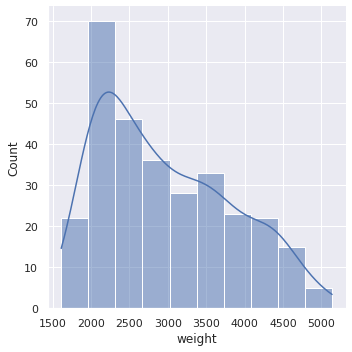

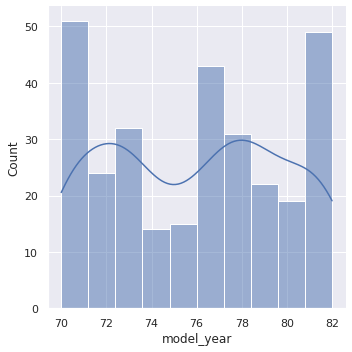

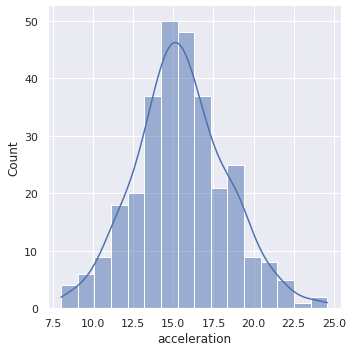

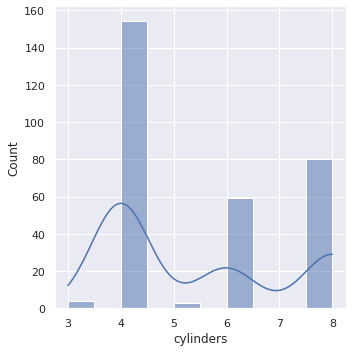

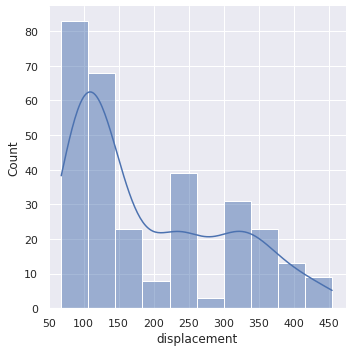

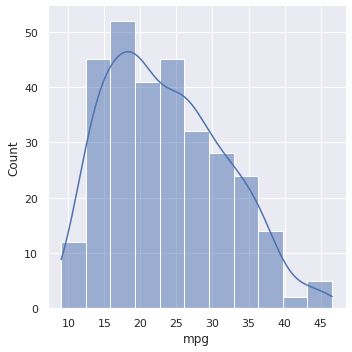

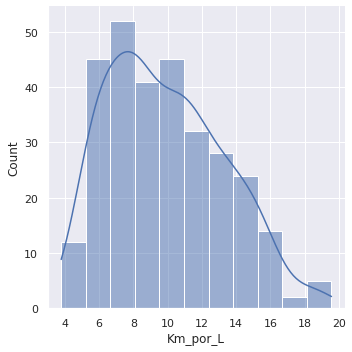

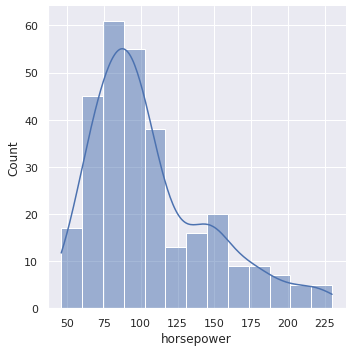

In [28]:
sns.displot(df_auto['weight'], kde=True, rug=False)
sns.displot(df_auto['model_year'], kde=True, rug=False)
sns.displot(df_auto['acceleration'], kde=True, rug=False)
sns.displot(df_auto['cylinders'], kde=True, rug=False)
sns.displot(df_auto['displacement'], kde=True, rug=False)
sns.displot(df_auto['mpg'], kde=True, rug=False)
sns.displot(df_auto['Km_por_L'], kde=True, rug=False)
sns.displot(df_auto['horsepower'], kde=True, rug=False)

## Gere um gráfico para mostrar a relação entre cada par de variável numérica.

In [29]:
df_auto.columns

Index(['mpg', 'Km_por_L', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'Marca', 'Nome', 'Region'],
      dtype='object')

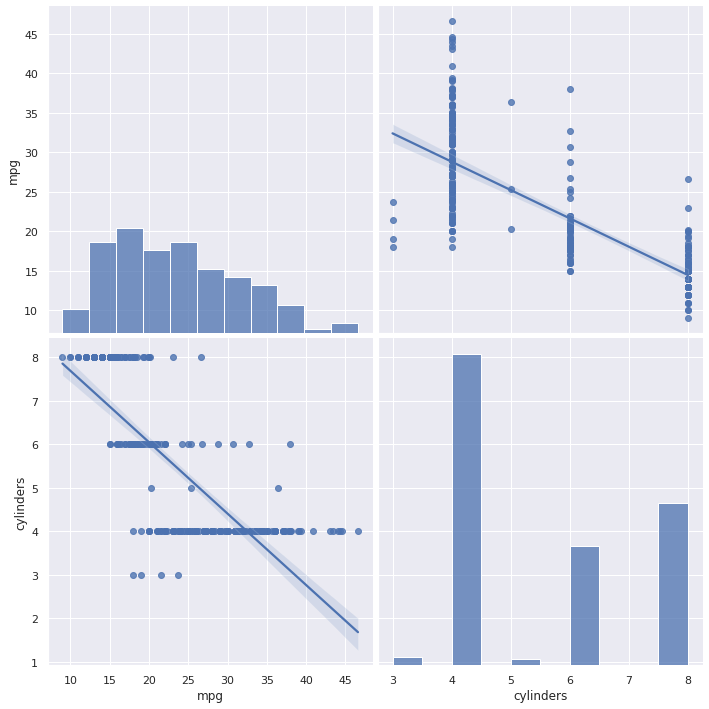

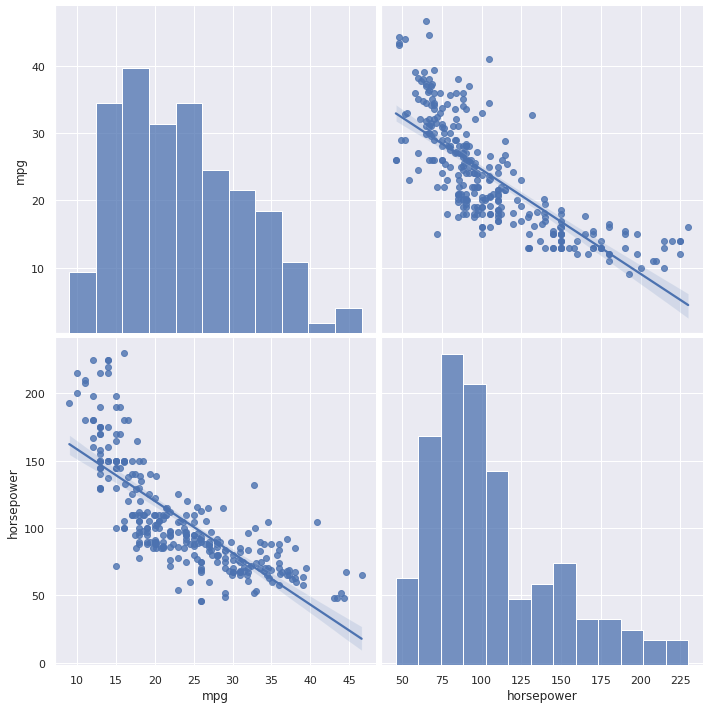

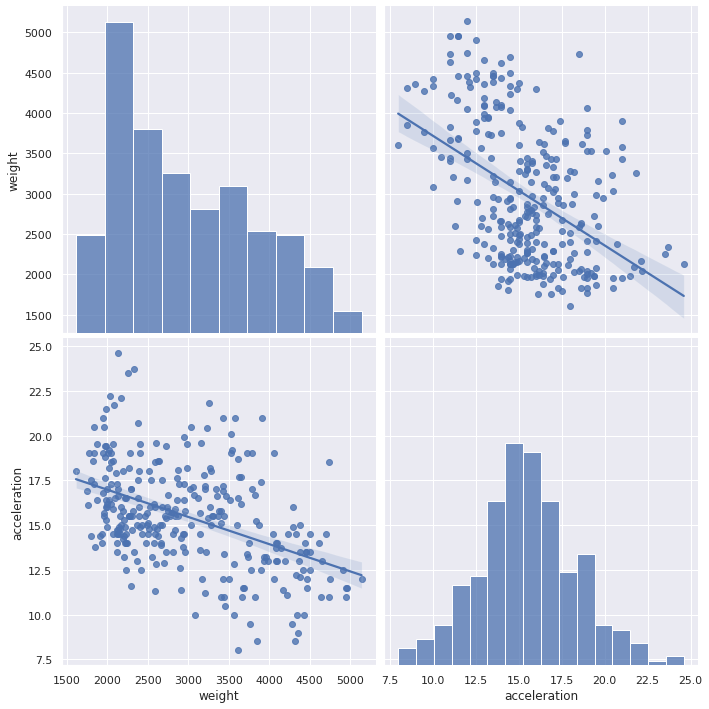

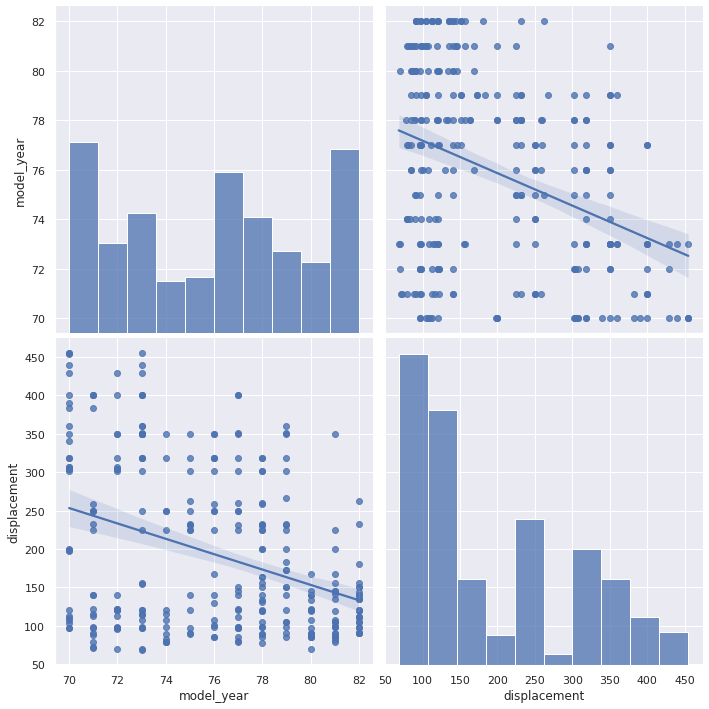

In [30]:
sns.pairplot(df_auto, height=5, kind='reg', vars=['mpg', 'cylinders'])
sns.pairplot(df_auto, height=5, kind='reg', vars=['mpg', 'horsepower'])
sns.pairplot(df_auto, height=5, kind='reg', vars=['weight', 'acceleration'])
sns.pairplot(df_auto, height=5, kind='reg', vars=['model_year', 'displacement'])

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

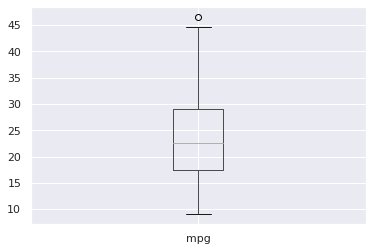

In [31]:
df_auto.boxplot(column=['mpg'])

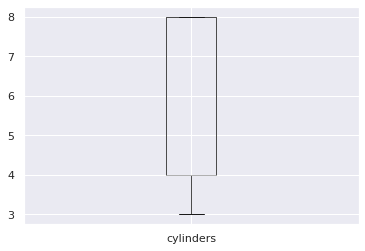

In [32]:
df_auto.boxplot(column=['cylinders'])

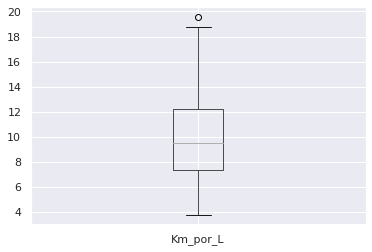

In [33]:
df_auto.boxplot(column=['Km_por_L'])

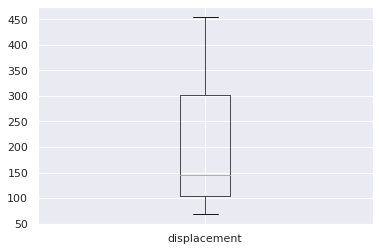

In [34]:
df_auto.boxplot(column=['displacement'])

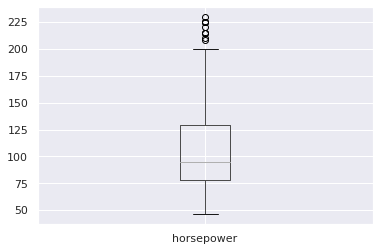

In [35]:
df_auto.boxplot(column=['horsepower'])

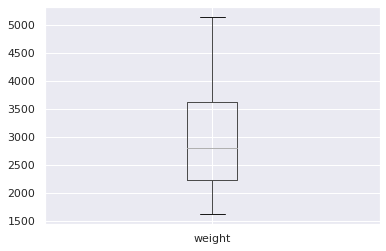

In [36]:
df_auto.boxplot(column=['weight'])

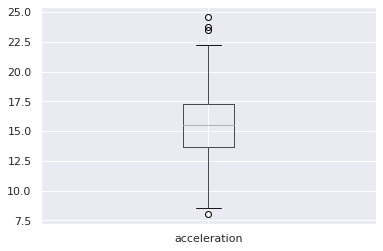

In [37]:
df_auto.boxplot(column=['acceleration'])

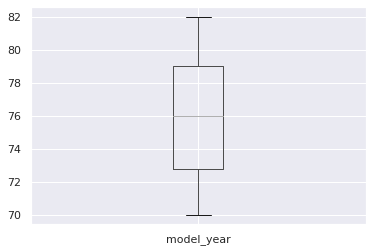

In [38]:
df_auto.boxplot(column=['model_year'])

## Crie uma nova coluna com a relação peso/potência para cada veículo e um scatterplot dessa coluna com a de consumo que você criou 

In [39]:
df_auto.insert(6, 'Wheigh/HP', df_auto['weight'] / df_auto['horsepower'])
df_auto

,mpg,Km_por_L,cylinders,displacement,horsepower,weight,Wheigh/HP,acceleration,model_year,origin,Marca,Nome,Region
0,18.0,7.56,8,307.0,130.0,3504,26.953846,12.0,70,Usa,chevrolet,chevelle malibu,North America
1,15.0,6.30,8,350.0,165.0,3693,22.381818,11.5,70,Usa,buick,skylark 320,North America
2,18.0,7.56,8,318.0,150.0,3436,22.906667,11.0,70,Usa,plymouth,satellite,North America
3,16.0,6.72,8,304.0,150.0,3433,22.886667,12.0,70,Usa,amc,rebel sst,North America
4,17.0,7.14,8,302.0,140.0,3449,24.635714,10.5,70,Usa,ford,torino,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,11.34,4,140.0,86.0,2790,32.441860,15.6,82,Usa,ford,mustang gl,North America
394,44.0,18.48,4,97.0,52.0,2130,40.961538,24.6,82,Europe,vw,pickup,Europe
395,32.0,13.44,4,135.0,84.0,2295,27.321429,11.6,82,Usa,dodge,rampage,North America
396,28.0,11.76,4,120.0,79.0,2625,33.227848,18.6,82,Usa,ford,ranger,North America


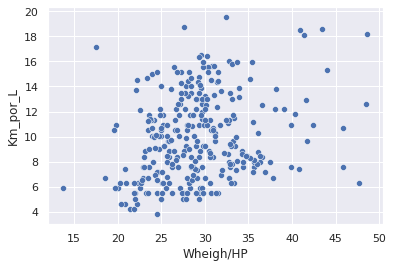

In [40]:
sns.scatterplot(x='Wheigh/HP', y='Km_por_L', data=df_auto)
